In [1]:


from datetime import datetime
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
import sys
import contextlib
import itertools
from math import comb
from numpy import linalg as LA
import math
from numpy.linalg import matrix_power
import matplotlib.pyplot as plt
from math import factorial as f
import networkx as nx
import itertools
import time
import pandas as pd
import random as rnd

from ipynb.fs.defs.functions import *

## Analytic calculations
This notebook outlines how to use our functions to compute the fixation probability using our code. First we will create a weighted network $G$.

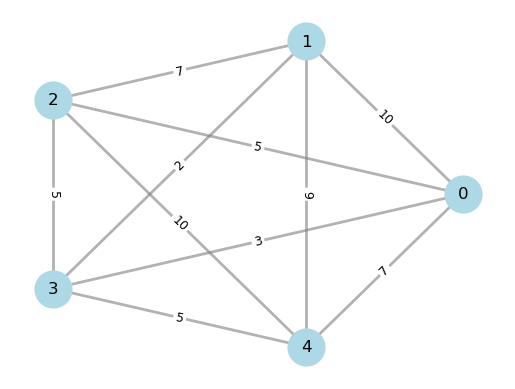

In [2]:
# Create a new graph for 5 nodes with integer weights
G_5_nodes = nx.Graph()

# Add 5 nodes to the graph
G_5_nodes.add_nodes_from(range(5))

# Add random weighted edges with integer weights between nodes
for i in range(5):
    for j in range(i+1, 5):
        # Generate a random integer weight for the edge
        weight = random.randint(1, 10)
        # Add the edge with the random integer weight
        G_5_nodes.add_edge(i, j, weight=weight)

# Uniform positioning of the nodes in a circular layout
pos_5_nodes = nx.circular_layout(G_5_nodes)

# Drawing nodes with a specific node size and node color
nx.draw_networkx_nodes(G_5_nodes, pos_5_nodes, node_size=700, node_color='lightblue')

# Drawing edges with a specific style
nx.draw_networkx_edges(G_5_nodes, pos_5_nodes, width=2, alpha=0.6, edge_color='gray')

# Drawing labels for nodes
nx.draw_networkx_labels(G_5_nodes, pos_5_nodes, font_size=12, font_family='sans-serif')

# Draw the edge weights with a box around them for better readability
edge_labels_5_nodes = nx.get_edge_attributes(G_5_nodes, 'weight')
nx.draw_networkx_edge_labels(G_5_nodes, pos_5_nodes, edge_labels=edge_labels_5_nodes, label_pos=0.5, font_size=9, bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'))

# Turn off the axis
plt.axis('off')

# Show the plot
plt.show()


 We use the function 'T_weightMat' to compute the transition probability matrix of the weighted network G_5_nodes

In [12]:
import numpy as np

np.set_printoptions(threshold=np.inf)

#  T_weightMat(G_5_nodes , 1)is the 2^5 x 2^5 dimensional matrix of the network G_5_nodes, for r=1
print(T_weightMat(G_5_nodes , r=1))




[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.26102646 0.53897354 0.         0.03225806 0.         0.06451613
  0.         0.         0.         0.05806452 0.         0.
  0.         0.         0.         0.         0.         0.04516129
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.10758082 0.         0.69241918 0.06666667 0.         0.
  0.06666667 0.         0.         0.         0.02666667 0.
  0.         0.         0.         0.         0.         0.
  0.04       0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.     

In [20]:
G_5_nodes[0]

AtlasView({1: {'weight': 10}, 2: {'weight': 5}, 3: {'weight': 3}, 4: {'weight': 7}})

To compute the fixation probability of this network for $r=1$, we will use the function 'matrix_solver'

In [14]:
matrix_solver(T_weightMat(G_5_nodes , r=1))

0.19999999999999996

To repeat this process for the unweighted networks, we can use the function 'T_Mat' instead of 'T_weightMat' on the unweighted network.

In [15]:
# Create a new unweighted graph from G_5_nodes by copying it and removing all edge weights
G_5_nodes_unweighted = G_5_nodes.copy()

# Iterate through all the edges and remove the weight attribute
for u, v, data in G_5_nodes_unweighted.edges(data=True):
    if 'weight' in data:
        del data['weight']


matrix_solver(T_Mat(G_5_nodes_unweighted , r=1))

C:\Users\bhaum\Desktop\functions.ipynb:54: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  "\n",


0.19999999999999996

Let's look at the plot of the weighted network against the unweighted network. As we can see below, the unweighted network is equivalent to the Moran process because the network is a regular graph, while the weighted version is a suppressor of selection.

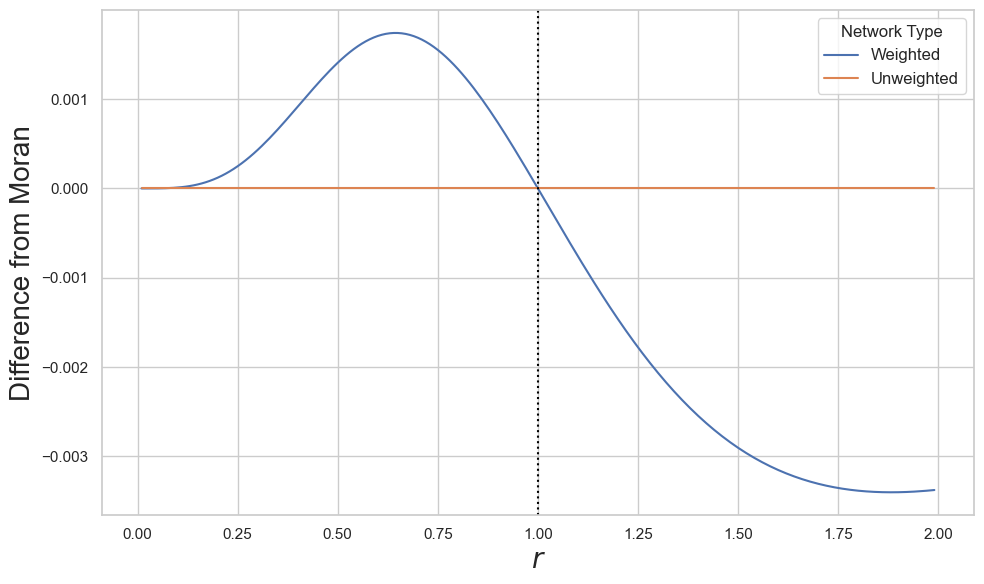

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(10, 6))

plt.plot([i/100 for i in range(1,200)],
         [matrix_solver(T_weightMat(G_5_nodes , r=i/100))
          -theoretic_fixation_moran(5,i/100) for i in range(1,200)],label='Weighted')
plt.plot([i/100 for i in range(1,200)],
         [matrix_solver(T_Mat(G_5_nodes_unweighted , r=i/100))
          -theoretic_fixation_moran(5,i/100) for i in range(1,200)], label='Unweighted')
# Adding title and labels with fontsize adjustments
plt.xlabel('$r$', fontsize=20)
plt.ylabel('Difference from Moran', fontsize=20)
plt.axvline(x=1, color='black', linestyle='dotted',linewidth=1.5)

plt.legend(title='Network Type', fontsize=12)
plt.tight_layout()
plt.show()


## Numerical Simulations

Now, let's turn to numerical simulations of the same networks.

In [ ]:
## Simulating the weighted and unweighted networks for 20 different values of $r$

simulated_unweighted = [simulation_count(G_5_nodes ,1000000,i/10) for i in range(1,20,2)]
simulated_weighted = [weighted_simulation_count(G_5_nodes ,1000000,i/10) for i in range(1,20,2)]

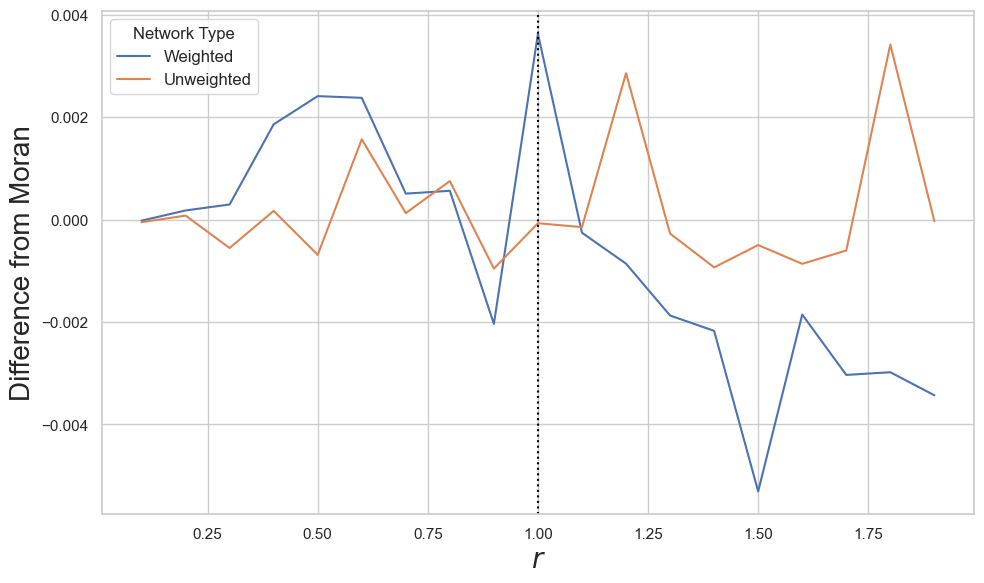

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(10, 6))

plt.plot([i/10 for i in range(1,20,2)],
         [simulated_weighted[i]
          -theoretic_fixation_moran(5,i/10) for i in range(1,20)],label='Weighted')
plt.plot([i/10 for i in range(1,20,2)],
         [simulated_unweighted[i]
          -theoretic_fixation_moran(5,i/10) for i in range(1,20)], label='Unweighted')
# Adding title and labels with fontsize adjustments
plt.xlabel('$r$', fontsize=20)
plt.ylabel('Difference from Moran', fontsize=20)
plt.axvline(x=1, color='black', linestyle='dotted',linewidth=1.5)

plt.legend(title='Network Type', fontsize=12)
plt.tight_layout()
plt.show()
